Decision Tree - Akses Server:
|--- WAKTU <= 0.50
|   |--- PAKET <= 0.50
|   |   |--- class: 1
|   |--- PAKET >  0.50
|   |   |--- PRIORITAS <= 0.50
|   |   |   |--- FREKWENSI <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- FREKWENSI >  1.50
|   |   |   |   |--- class: 0
|   |   |--- PRIORITAS >  0.50
|   |   |   |--- class: 0
|--- WAKTU >  0.50
|   |--- PRIORITAS <= 0.50
|   |   |--- class: 0
|   |--- PRIORITAS >  0.50
|   |   |--- FREKWENSI <= 0.50
|   |   |   |--- class: 0
|   |   |--- FREKWENSI >  0.50
|   |   |   |--- FREKWENSI <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- FREKWENSI >  1.50
|   |   |   |   |--- class: 0



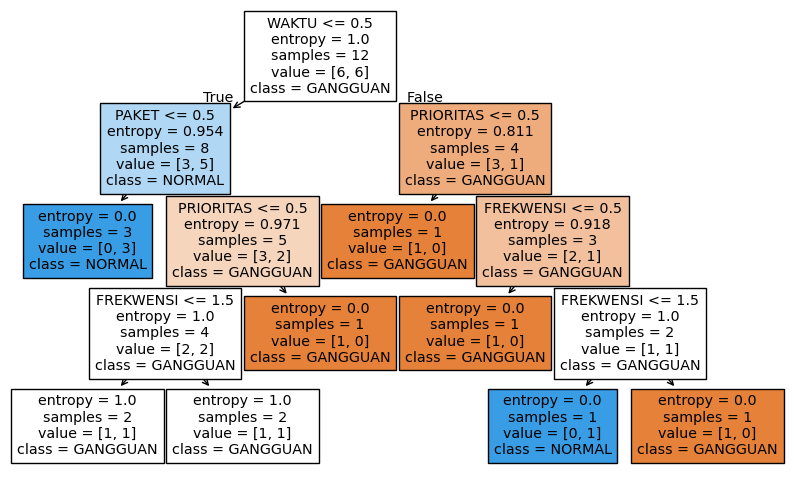


Decision Tree - Hipertensi:
|--- Berat <= 0.50
|   |--- class: 0
|--- Berat >  0.50
|   |--- Berat <= 1.50
|   |   |--- Usia <= 0.50
|   |   |   |--- class: 1
|   |   |--- Usia >  0.50
|   |   |   |--- Kelamin <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Kelamin >  0.50
|   |   |   |   |--- class: 1
|   |--- Berat >  1.50
|   |   |--- class: 0



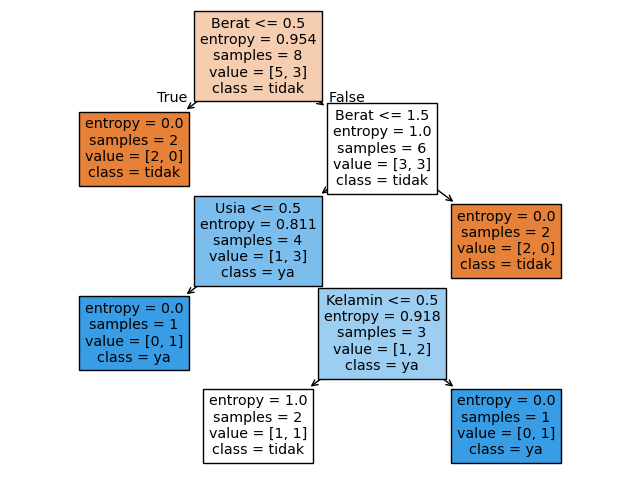

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

data_server = {
    "WAKTU": ["PENDEK","PENDEK","PANJANG","PANJANG","PENDEK","PANJANG","PANJANG","PANJANG","PANJANG","PANJANG","PENDEK","PANJANG"],
    "PAKET": ["BESAR","KECIL","BESAR","KECIL","BESAR","KECIL","KECIL","KECIL","BESAR","KECIL","BESAR","BESAR"],
    "FREKWENSI": ["SEDANG","RENDAH","SEDANG","TINGGI","TINGGI","RENDAH","TINGGI","SEDANG","TINGGI","SEDANG","SEDANG","RENDAH"],
    "PRIORITAS": ["RENDAH","TINGGI","TINGGI","RENDAH","TINGGI","TINGGI","RENDAH","RENDAH","TINGGI","RENDAH","TINGGI","TINGGI"],
    "GANGGUAN": ["GANGGUAN","GANGGUAN","NORMAL","NORMAL","GANGGUAN","GANGGUAN","GANGGUAN","NORMAL","NORMAL","GANGGUAN","NORMAL","NORMAL"]
}

df_server = pd.DataFrame(data_server)

# Encode kategori
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in df_server.columns:
    le = LabelEncoder()
    df_server[col] = le.fit_transform(df_server[col])
    encoders[col] = le

X_server = df_server.drop("GANGGUAN", axis=1)
y_server = df_server["GANGGUAN"]

# Train Decision Tree
tree_server = DecisionTreeClassifier(criterion="entropy", random_state=0)
tree_server.fit(X_server, y_server)

# Rules dalam bentuk teks
print("Decision Tree - Akses Server:")
print(export_text(tree_server, feature_names=list(X_server.columns)))

# Visualisasi
plt.figure(figsize=(10,6))
plot_tree(tree_server, feature_names=X_server.columns, class_names=encoders["GANGGUAN"].classes_, filled=True)
plt.show()

data_hipertensi = {
    "Nama": ["Ali","Edi","Annie","Budiman","Herman","Didi","Rina","Gatot"],
    "Usia": ["muda","muda","muda","tua","tua","muda","tua","tua"],
    "Berat": ["overweight","underweight","average","overweight","overweight","underweight","overweight","average"],
    "Kelamin": ["pria","pria","wanita","pria","pria","pria","wanita","pria"],
    "Hipertensi": ["ya","tidak","tidak","tidak","ya","tidak","ya","tidak"]
}

df_hip = pd.DataFrame(data_hipertensi)

# Encode
encoders_hip = {}
for col in df_hip.columns:
    le = LabelEncoder()
    df_hip[col] = le.fit_transform(df_hip[col])
    encoders_hip[col] = le

X_hip = df_hip.drop(["Nama","Hipertensi"], axis=1)
y_hip = df_hip["Hipertensi"]

# Train Decision Tree
tree_hip = DecisionTreeClassifier(criterion="entropy", random_state=0)
tree_hip.fit(X_hip, y_hip)

print("\nDecision Tree - Hipertensi:")
print(export_text(tree_hip, feature_names=list(X_hip.columns)))

plt.figure(figsize=(8,6))
plot_tree(tree_hip, feature_names=X_hip.columns, class_names=encoders_hip["Hipertensi"].classes_, filled=True)
plt.show()
